In [1]:
import numpy as np
import qiskit

In [2]:
from qiskit.providers.aer import QasmSimulator

# Build assertions

# A0

In [3]:
assert0_base = qiskit.QuantumCircuit(6,5, name="assert0")
assert0_base.measure(range(5),range(5))
assert0_base.barrier(range(6))

In [4]:
assert0_cond = qiskit.QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[6]; // Quantum Register
creg c[5]; // Classical Register
 
if (c==0) x q[5]; // q[5] == 1 means assertion passed
""")

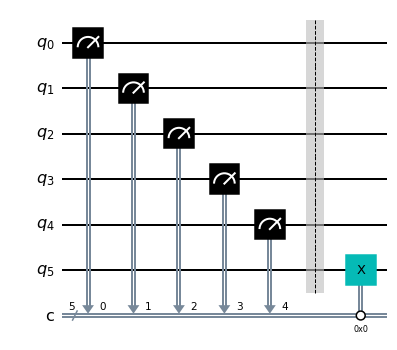

In [5]:
assert0 = assert0_base.compose(assert0_cond, range(6), front = False)
assert0.draw('mpl')

In [6]:
assert0_instr = assert0.to_instruction()

## A1

In [7]:
assert_1_base = qiskit.QuantumCircuit(4,3, name = "assert1")
assert_1_base.h(range(3))
assert_1_base.measure(range(3),range(3))
assert_1_base.barrier(range(3))
assert_1_base.h(range(3))
assert_1_base.barrier(range(4))

In [8]:
assert1_cond = qiskit.QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[4]; // Quantum Register
creg c[3]; // Classical Register
 
if (c==0) x q[3]; // q[3] == 1 means assertion passed
""")

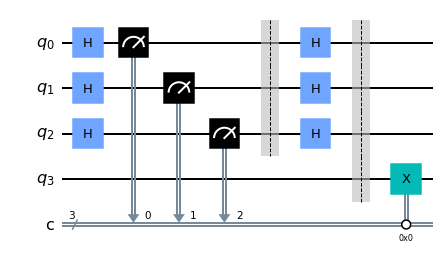

In [9]:
assert1 = assert_1_base.compose(assert1_cond, range(4), front = False)
assert1.draw('mpl')

In [10]:
assert1_instr = assert1.to_instruction()

## A2

In [11]:
assert2_base = qiskit.QuantumCircuit(4,3, name = "assert2")
assert2_base.cx(0,[2,1])
assert2_base.h(0)
assert2_base.barrier(range(3))
assert2_base.measure(range(3),range(3))
assert2_base.barrier(range(3))
assert2_base.h(0)
assert2_base.cx(0,[1,2])
assert2_base.barrier(range(4))

In [12]:
assert2_cond = qiskit.QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[4]; // Quantum Register
creg c[3]; // Classical Register
 
if (c==0) x q[3]; // q[3] == 1 means assertion passed
""")

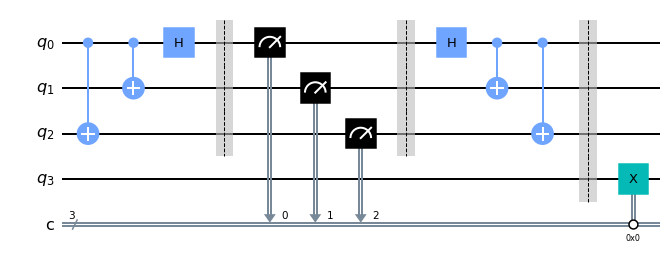

In [13]:
assert2 = assert2_base.compose(assert2_cond, range(4), front = False)
assert2.draw('mpl')

In [14]:
assert2_instr = assert2.to_instruction()

## A3

In [15]:
assert_3_base = qiskit.QuantumCircuit(4,3, name = "assert3")
assert_3_base.h(2)
assert_3_base.measure(range(3),range(3))
assert_3_base.barrier(range(3))
assert_3_base.h(2)
assert_3_base.barrier(range(4))

In [16]:
assert3_cond = qiskit.QuantumCircuit.from_qasm_str("""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[4]; // Quantum Register
creg c[3]; // Classical Register
 
if (c==0) x q[3]; // q[3] == 1 means assertion passed
""")

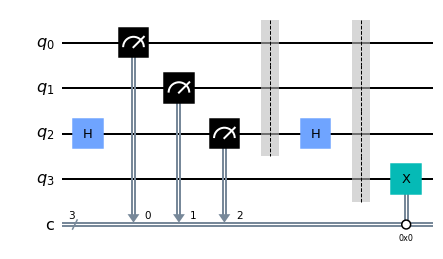

In [17]:
assert3 = assert_3_base.compose(assert3_cond, range(4), front = False)
assert3.draw('mpl')

In [18]:
assert3_instr = assert3.to_instruction()

# Helper: the QFT

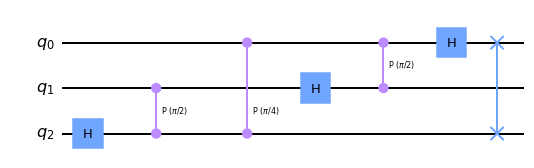

In [19]:
qft = qiskit.QuantumCircuit(3, name = "qft")
qft.h(2)
qft.cp(np.pi/2,1,2)
qft.cp(np.pi/4,0,2)
qft.h(1)
qft.cp(np.pi/2,0,1)
qft.h(0)
qft.swap(0,2)
qft.draw('mpl')

In [20]:
qft_instr = qft.to_instruction()

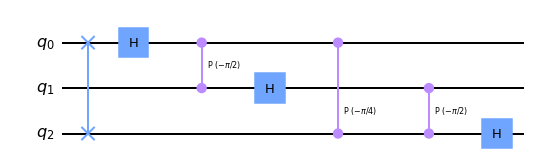

In [21]:
qft_inverse = qiskit.QuantumCircuit(3, name="qft^-1")
qft_inverse.swap(0,2)
qft_inverse.h(0)
qft_inverse.cp(-np.pi/2, 0, 1)
qft_inverse.h(1)
qft_inverse.cp(-np.pi/4, 0, 2)
qft_inverse.cp(-np.pi/2, 1, 2)
qft_inverse.h(2)
qft_inverse.draw('mpl')


In [22]:
qft_inverse_instr = qft_inverse.to_instruction()

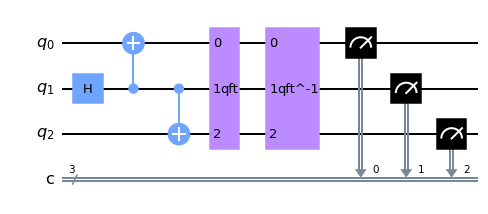

In [23]:
qft_test = qiskit.QuantumCircuit(3,3, name = "test identity")
qft_test.h(1)
qft_test.cx(1,0)
qft_test.cx(1,2)
qft_test.append(qft_instr, [0,1,2])
qft_test.append(qft_inverse_instr, [0,1,2])
qft_test.measure(range(3),range(3))

qft_test.draw('mpl')

In [24]:
'''
backend = QasmSimulator()
circ_compiled = qiskit.transpile(qft_test, backend)
job_sim = backend.run(circ_compiled, shots = 1024)
results_sim = job_sim.result()
counts = results_sim.get_counts(circ_compiled)
print(counts)
qiskit.visualization.plot_histogram(counts)
'''

'\nbackend = QasmSimulator()\ncirc_compiled = qiskit.transpile(qft_test, backend)\njob_sim = backend.run(circ_compiled, shots = 1024)\nresults_sim = job_sim.result()\ncounts = results_sim.get_counts(circ_compiled)\nprint(counts)\nqiskit.visualization.plot_histogram(counts)\n'

# Shor's algorithm

In [25]:
shors_full = qiskit.QuantumCircuit(9, 5, name = 'shors')

In [26]:
# shors_full.rx(0.2*np.pi, range(5))

In [27]:
shors_full.append(assert0_instr, [0,1,2,3,4,5], [0,1,2,3,4])

In [28]:
# shors_full.rx(0.2*np.pi, range(5)) # Noise
shors_full.h(0)
shors_full.h(1)
shors_full.h(2)

In [29]:
shors_full.append(assert1_instr, [0,1,2,6], [0,1,2])

In [30]:
# shors_full.x(4)
shors_full.cx(0,[3,4])

In [31]:
shors_full.append(assert2_instr, [0,3,4,7], [0,1,2])

In [32]:
# shors_full.append(qft_instr, [0,1,2])
shors_full.append(qft_inverse_instr, [0,1,2])

In [33]:
# shors_full.append(assert3_instr, [0,1,2,8], [0,1,2])

/home/dsmishler/anaconda3/lib/python3.8/site-packages/qiskit/visualization/matplotlib.py:317: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  self._get_layer_widths()


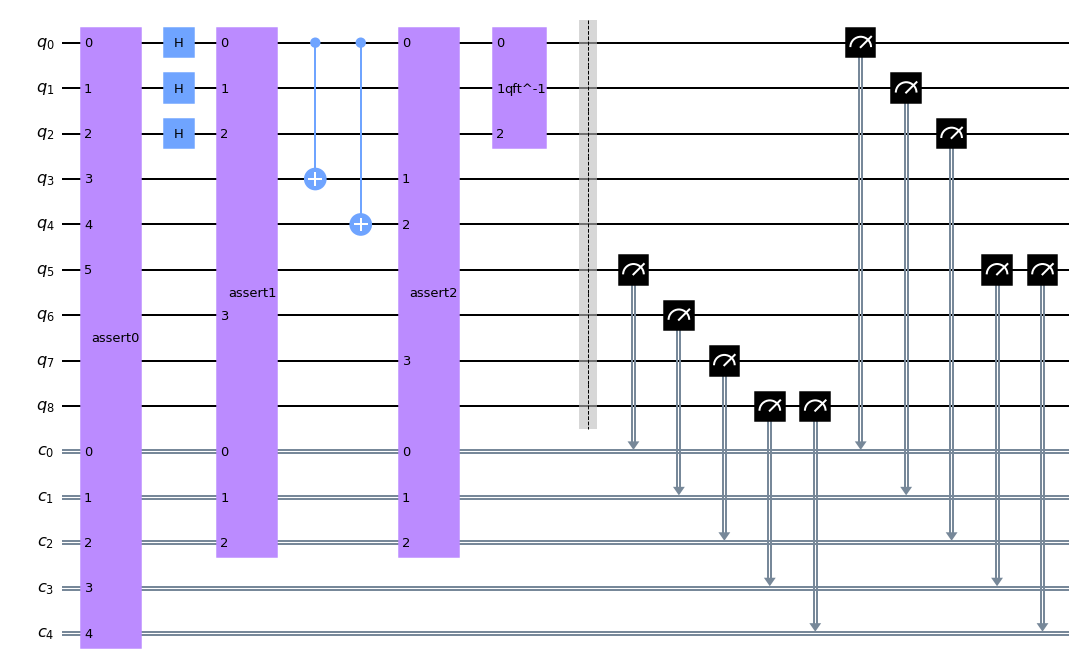

In [34]:
shors_full.barrier(range(9))
shors_full.measure(5,0)
shors_full.measure(6,1)
shors_full.measure(7,2)
shors_full.measure(8,3)
shors_full.measure(8,4)
shors_full.measure(range(3),range(3))
shors_full.measure(5,[3,4])
shors_full.draw('mpl')

In [35]:
backend = QasmSimulator()
circ_compiled = qiskit.transpile(shors_full, backend)
job_sim = backend.run(circ_compiled, shots = 1024)
results_sim = job_sim.result()

In [36]:
counts = results_sim.get_counts(circ_compiled)
print(counts)

{'11000': 517, '11100': 507}


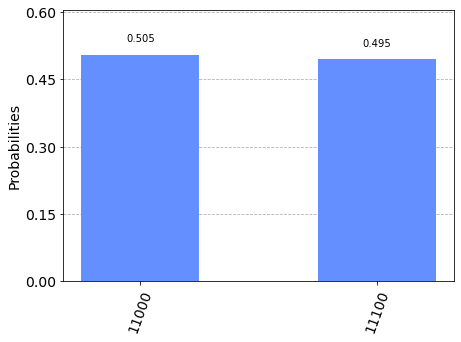

In [37]:
qiskit.visualization.plot_histogram(counts)